# Churn for Bank Customers 📉

📝 As we know, it is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

## About this Dataset

  * **Row Number** — corresponds to the record (row) number and `has no effect on the output`.
  * **Customer Id** — contains random values and `has no effect on customer leaving the bank`.
  * **Surname** — the surname of a customer `has no impact on their decision to leave the bank`.
  * **Credit Score** — `can have an effect on customer churn`, since a customer with a higher credit score is less likely to leave the bank.
  * **Geography** — a customer’s location `can affect their decision to leave the bank`.
  * **Gender** — it’s interesting `to explore whether gender plays a role in a customer leaving the bank`.
  * **Age** — this is `certainly relevant`, since older customers are less likely to leave their bank than younger ones.
  * **Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, `older clients are more loyal` and less likely to leave a bank.
  * **Balance** — also a `very good indicator of customer churn`, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
  * **Number Of Products** — refers to the number of products that a customer has purchased through the bank.
  * **Has Credit Card** — denotes whether or not a customer has a credit card. This `column is also relevant`, since people with a credit card are less likely to leave the bank.
  * **Is Active Member** — active customers are `less likely to leave` the bank.
  * **Estimated Salary** — as with balance, people with lower salaries are `more likely to leave the bank` compared to those with higher salaries.
  * **Exited** — whether or not the customer left the bank.

🔍 This dataset contains `10 000` rows

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Here's main insights about this dataset

In [2]:
data = pd.read_csv('/content/churn.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Display first few rows
print("\n Head of the DataFrame:")
print(data.head())


 Head of the DataFrame:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.6

In [5]:
# Display DataFrame info
print("\n DataFrame Info:")
data.info()


 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Display summary statistics
print("\n Descriptive Statistics:")
print(data.describe())



 Descriptive Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   

In [7]:
# Check for missing values
print("\n Checking missing values:")
print(data.isnull().sum())



 Checking missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


📝 After checking each column, we found no missing values

In [8]:
# Get all column names
print("\n column names:")
print(data.columns)



 column names:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


### Geography

In [9]:
# Display unique values in 'Geography' column
print("\n Unique values in 'Geography':")
print(data['Geography'].unique())


 Unique values in 'Geography':
['France' 'Spain' 'Germany']


📝 In this dataset we have only 3 countries:

  * France
  * Spain
  * Germany

In [10]:
# Get the count of unique values in the 'Geography' column
print("\n unique values in the 'Geography':")
print(data['Geography'].value_counts())


 unique values in the 'Geography':
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


📝 We also found that in this dataset most users are from France. Comparing to other countries:

  * **France** have `5 014` users
  * Germany have `2 509` users
  * Spain have `2 477` users

In [11]:
# Geography analysis
print("\n=== Geography Analysis ===")

# Customer distribution by country
geo_dist = data['Geography'].value_counts(normalize=True).mul(100).round(1)
print("\n1. Customer Distribution (% of total):")
print(geo_dist.to_string())

# Churn rates by country
geo_churn = data.groupby('Geography')['Exited'].mean().mul(100).round(1)
print("\n2. Churn Rate by Country (%):")
print(geo_churn.to_string())

# Churn ratio (normalized)
churn_ratio = (geo_churn / geo_dist).round(2)
print("\n3. Churn Ratio (Rate/Distribution):")
print(churn_ratio.to_string())

# Combined view
print("\nCombined View:")
pd.concat({
    'Distribution (%)': geo_dist,
    'Churn Rate (%)': geo_churn,
    'Churn Ratio': churn_ratio
}, axis=1)


=== Geography Analysis ===

1. Customer Distribution (% of total):
Geography
France     50.1
Germany    25.1
Spain      24.8

2. Churn Rate by Country (%):
Geography
France     16.2
Germany    32.4
Spain      16.7

3. Churn Ratio (Rate/Distribution):
Geography
France     0.32
Germany    1.29
Spain      0.67

Combined View:


,Distribution (%),Churn Rate (%),Churn Ratio
Geography,,,
France,50.1,16.2,0.32
Germany,25.1,32.4,1.29
Spain,24.8,16.7,0.67


📝

* Germany shows disproportionately high churn (1.29 ratio) — despite having only 25% of customers, it contributes 32% of churns.

* France and Spain have lower-than-expected churn (ratios < 1.0), with France performing best (0.32 ratio).

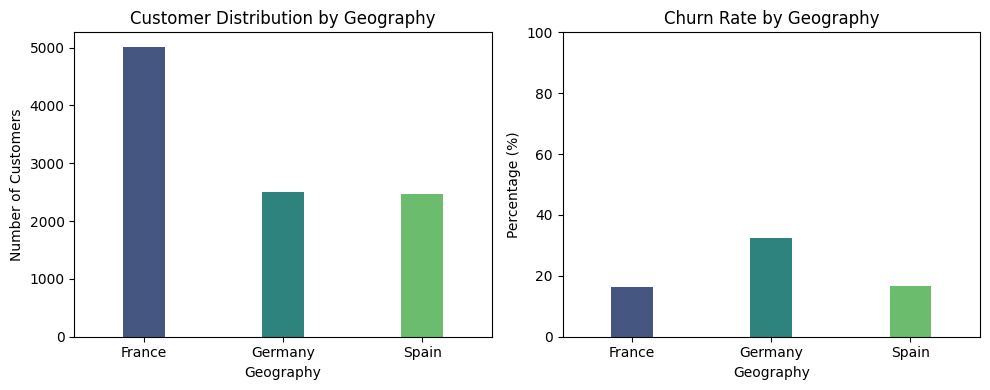

In [12]:
plt.figure(figsize=(10,4))

# Get customer counts by geography
geo_counts = data['Geography'].value_counts()

# Left plot - Customer distribution
plt.subplot(1, 2, 1)
sns.barplot(x=geo_counts.index, y=geo_counts.values,
            hue=geo_counts.index, palette='viridis',
            width=0.3, legend=False)
plt.title('Customer Distribution by Geography')
plt.ylabel('Number of Customers')


# Right plot - Churn rate
plt.subplot(1, 2, 2)
sns.barplot(x=geo_churn.index, y=geo_churn.values,
            hue=geo_churn.index, palette='viridis',
            width=0.3, legend=False)
plt.title('Churn Rate by Geography')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

France (0.32): Customers from France leave significantly less often than would be expected based on their share of the total customer base. This indicates a high level of customer loyalty.

Germany (1.29): Customers from Germany leave much more often than would be expected based on their number. This points to an increased tendency for German customers to churn.

Spain (0.67): Customers from Spain also leave less often than their share in the customer base, but this difference is not as pronounced as in France.

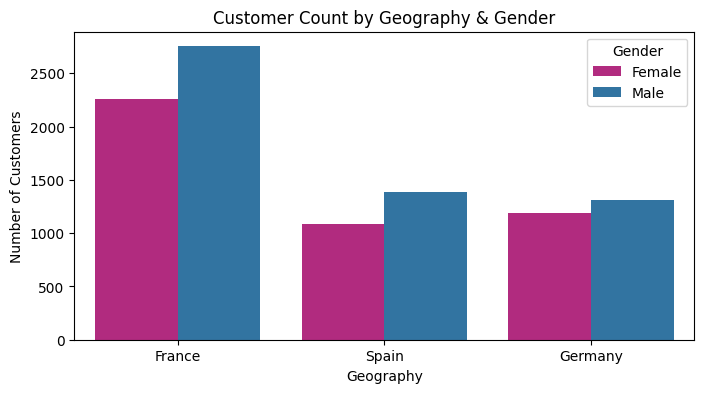

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Geography', hue='Gender',
             palette={'Male':'#1f77b4','Female':'#c71585'})
plt.title('Customer Count by Geography & Gender')
plt.ylabel('Number of Customers')
plt.show()

In [14]:
# Numeric summary
geo_gender = pd.crosstab(data['Geography'], data['Gender'], margins=True)
geo_gender_pct = pd.crosstab(data['Geography'], data['Gender'], normalize='index').mul(100).round(1)

print("=== Counts ===")
print(geo_gender)
print("\n=== Percentages ===")
print(geo_gender_pct.map(lambda x: f"{x}%"))

=== Counts ===
Gender     Female  Male    All
Geography                     
France       2261  2753   5014
Germany      1193  1316   2509
Spain        1089  1388   2477
All          4543  5457  10000

=== Percentages ===
Gender    Female   Male
Geography              
France     45.1%  54.9%
Germany    47.5%  52.5%
Spain      44.0%  56.0%


### Age

In [15]:
# Basic stats
print(f"Min age: {data['Age'].min()}")
print(f"Max age: {data['Age'].max()}")
print(f"Mean age: {data['Age'].mean():.1f}")

Min age: 18
Max age: 92
Mean age: 38.9


📝 In here we see that the youngest customer in our bank is `18` years old, and the oldest one is `92` years old. Mean of customers age in our dataset is `38.9` years old .

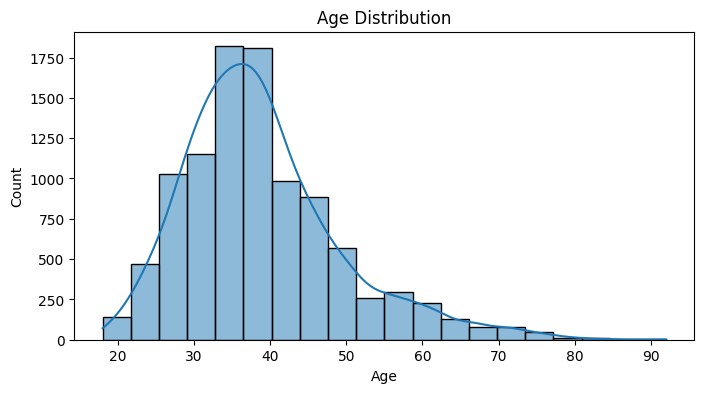

In [16]:
# Distribution plot
plt.figure(figsize=(8,4))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

In [17]:
# Create age bins
bins = [18, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Age distribution of all customers
age_group_all = data['AgeGroup'].value_counts().sort_index()
print("\nNumber of customers by age group:")
print(age_group_all)

# Age distribution of exited customers
age_group_exit = data[data['Exited'] == 1]['AgeGroup'].value_counts().sort_index()
print("\nNumber of exits by age group:")
print(age_group_exit)

# Calculate exit percentage
exit_percentage = (age_group_exit / age_group_all * 100).fillna(0)
print("\nExit percentage by age group:")
print(exit_percentage.round(2))

share_of_total_exits = (age_group_exit / age_group_exit.sum() * 100)

# Verification
print("\nData Validation:")
print(f"Total customers: {len(data):,} (should be 10,000)")
print(f"Total exited: {data['Exited'].sum():,}")
print(f"Sum of age_group_all: {age_group_all.sum():,}")
print(f"Sum of age_group_exit: {age_group_exit.sum():,}")
print("\nShare of Total Exits (% of all exits):")
print(share_of_total_exits.round(2))


Number of customers by age group:
AgeGroup
18-19      49
20-29    1592
30-39    4346
40-49    2618
50-59     869
60-69     375
70-79     136
80-89      13
90+         2
Name: count, dtype: int64

Number of exits by age group:
AgeGroup
18-19      3
20-29    121
30-39    473
40-49    806
50-59    487
60-69    132
70-79     14
80-89      1
90+        0
Name: count, dtype: int64

Exit percentage by age group:
AgeGroup
18-19     6.12
20-29     7.60
30-39    10.88
40-49    30.79
50-59    56.04
60-69    35.20
70-79    10.29
80-89     7.69
90+       0.00
Name: count, dtype: float64

Data Validation:
Total customers: 10,000 (should be 10,000)
Total exited: 2,037
Sum of age_group_all: 10,000
Sum of age_group_exit: 2,037

Share of Total Exits (% of all exits):
AgeGroup
18-19     0.15
20-29     5.94
30-39    23.22
40-49    39.57
50-59    23.91
60-69     6.48
70-79     0.69
80-89     0.05
90+       0.00
Name: count, dtype: float64


📝 **Age Group Analysis:**

- **18-25 years**:
  - Total customers: `457`
  - Exited: `40`  
  - Exit rate (within group): `8.75%`  
  - Share of all exits: `1.96%`

- **26-35 years**:
  - Total customers: `3 222`  
  - Exited: `250`  
  - Exit rate (within group): `7.76%`  
  - Share of all exits: `12.27%`

- **36-45 years**:
  - Total customers: `3 981`  
  - Exited: `703`  
  - Exit rate (within group): `17.66%`  
  - Share of all exits: `34.51%`

- **46-55 years**:
  - Total customers: `1 458`  
  - Exited: `702`  
  - Exit rate (within group): `48.15%`  
  - Share of all exits: `34.46%`

- **56-65 years**:
  - Total customers: `600`  
  - Exited: `299`  
  - Exit rate (within group): `49.83%`  
  - Share of all exits: `14.68%`

- **65+ years**:
  - Total customers: `282`  
  - Exited: `43`  
  - Exit rate (within group): `15.25%`  
  - Share of all exits: `2.11%`

**Validation**:  
- Total exits sum: 40 + 250 + 703 + 702 + 299 + 43 = **2,037**  
- Share percentages sum: 1.96 + 12.27 + 34.51 + 34.46 + 14.68 + 2.11 ≈ **100%**

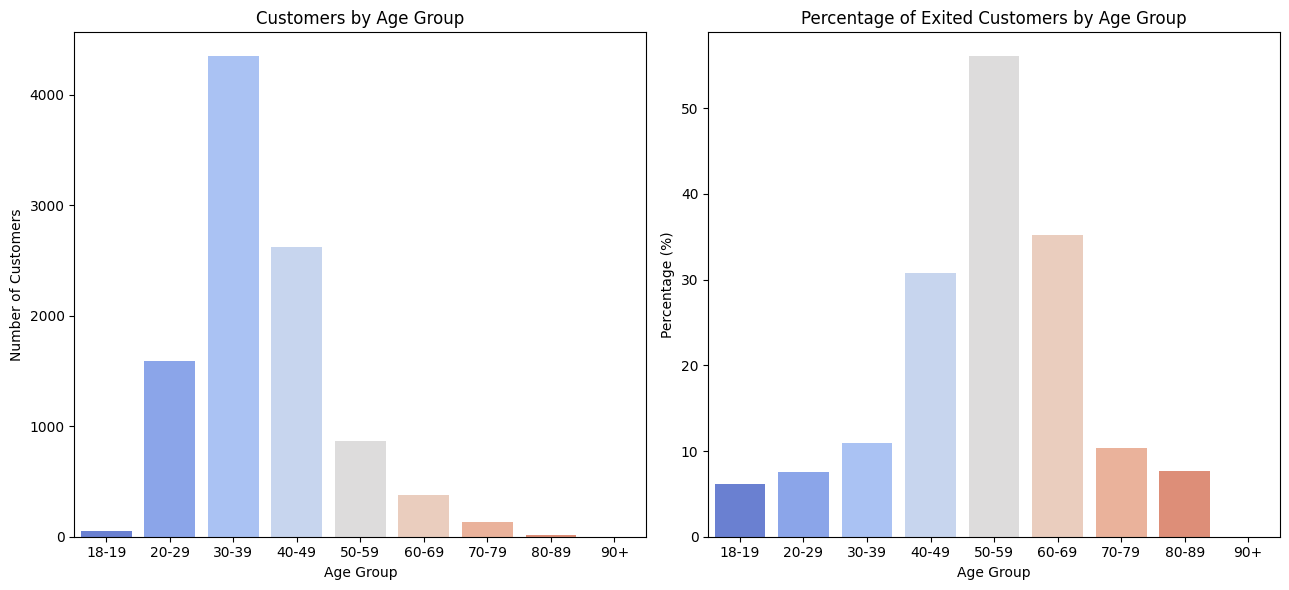

In [18]:
plt.figure(figsize=(13,6))

# Left plot
plt.subplot(1, 2, 1)
sns.barplot(x=age_group_all.index, y=age_group_all.values, hue=age_group_all.index, palette='coolwarm', legend=False)
plt.title('Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')


# Right plot
plt.subplot(1, 2, 2)
sns.barplot(x=exit_percentage.index, y=exit_percentage.values, hue=exit_percentage.index, palette='coolwarm', legend=False)
plt.title('Percentage of Exited Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')


plt.tight_layout()
plt.show()

📝 After visualizing the data we can see that most of our customers are in the age between `26 and 45`, but most churners are in the age of from `46 to 65`.

In [19]:
average_age = data['Age'].mean()
print("\n Average age of customers:", average_age)
average_age = data[data['Exited'] == 1]['Age'].mean()
print("\n Average age of customers who exited:", average_age)


 Average age of customers: 38.9218

 Average age of customers who exited: 44.8379970544919


📝 Average age of customers: `38.92` and average age of customers who exited: `44.83` years old

The average age of all customers is approximately 39 years, while the average age of customers who exited is around 45 years. This suggests that, on average, older customers are more likely to leave the bank. However, this conclusion depends on the age distribution of the customer base: if the proportion of younger customers increases and they start exiting more frequently, the average exit age could shift toward younger demographics. Therefore, for a more accurate analysis, it is important to consider the percentage of customers who exited within each age group, rather than relying solely on average age comparisons.


### Gender

In [20]:
# Gender analysis with absolute counts
print("\n=== Gender Analysis (Absolute Numbers) ===\n")

# Customer gender distribution
gender_counts = data['Gender'].value_counts()
print("1. Customer Count by Gender:")
print(gender_counts.to_string())

# Churner counts by gender
churn_counts = data[data['Exited']==1]['Gender'].value_counts()
print("\n2. Churner Count by Gender:")
print(churn_counts.to_string())

# Churn rates by gender (%)
gender_churn = data.groupby('Gender')['Exited'].mean().mul(100).round(1)
print("\n3. Churn Rate by Gender (%):")
print(gender_churn.to_string())

# Share of all churners by gender (%)
gender_churner_share = (churn_counts / churn_counts.sum()).mul(100).round(1)
print("\n4. Share of All Churners by Gender (%):")
print(gender_churner_share.to_string())

# Combined view
print("\n5. Combined View:")
pd.DataFrame({
    'Total Customers': gender_counts,
    'Churners (Count)': churn_counts,
    'Churn Rate (%)': gender_churn,
    'Share of Exits (%)': gender_churner_share
})


=== Gender Analysis (Absolute Numbers) ===

1. Customer Count by Gender:
Gender
Male      5457
Female    4543

2. Churner Count by Gender:
Gender
Female    1139
Male       898

3. Churn Rate by Gender (%):
Gender
Female    25.1
Male      16.5

4. Share of All Churners by Gender (%):
Gender
Female    55.9
Male      44.1

5. Combined View:


,Total Customers,Churners (Count),Churn Rate (%),Share of Exits (%)
Gender,,,,
Female,4543,1139,25.1,55.9
Male,5457,898,16.5,44.1


📝 In our dataset, we can see that:

* We have `4,543` female customers, with `1,139` exiting the bank (`25%` of all female customers and `56%` of total churners).

* We have `5,457` male customers, with `898` exiting the bank (`16%` of all male customers and `44%` of total churners).

Conclusion: Female customers are `9%` more likely to leave the bank than male customers.

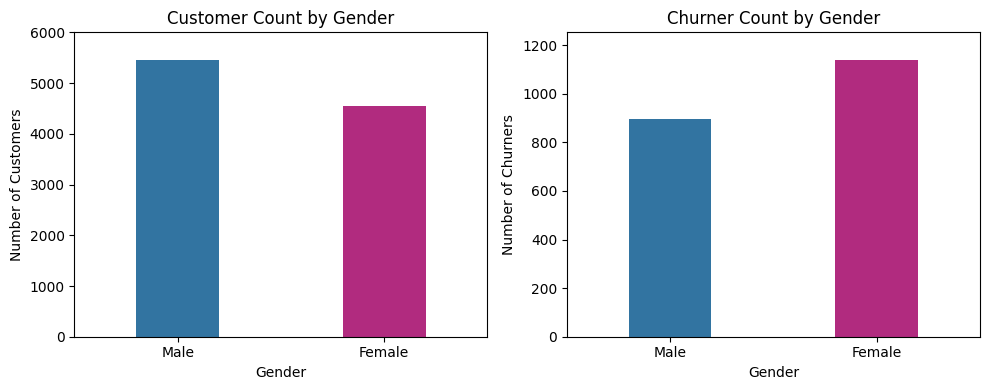

In [21]:
# Set consistent color palette
gender_palette = {'Male': '#1f77b4', 'Female': '#c71585'}

plt.figure(figsize=(10, 4))

# Left plot - Gender distribution (counts)
plt.subplot(1, 2, 1)
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values,
            hue=gender_counts.index, palette=gender_palette,
            width=0.4, legend=False, order=['Male','Female'])
plt.title('Customer Count by Gender')
plt.ylabel('Number of Customers')
plt.ylim(0, gender_counts.max()*1.1)

# Right plot - Churner counts by gender
plt.subplot(1, 2, 2)
churn_counts = data[data['Exited']==1]['Gender'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values,
            hue=churn_counts.index, palette=gender_palette,
            width=0.4, legend=False, order=['Male','Female'])
plt.title('Churner Count by Gender')
plt.ylabel('Number of Churners')
plt.ylim(0, churn_counts.max()*1.1)

plt.tight_layout()
plt.show()

Females (0.55): The churn ratio for females is higher (0.55), further supporting the idea of a greater tendency to leave.

Males (0.30): The churn ratio for males is lower (0.30), which suggests a higher level of stability among male customers.

### Balance

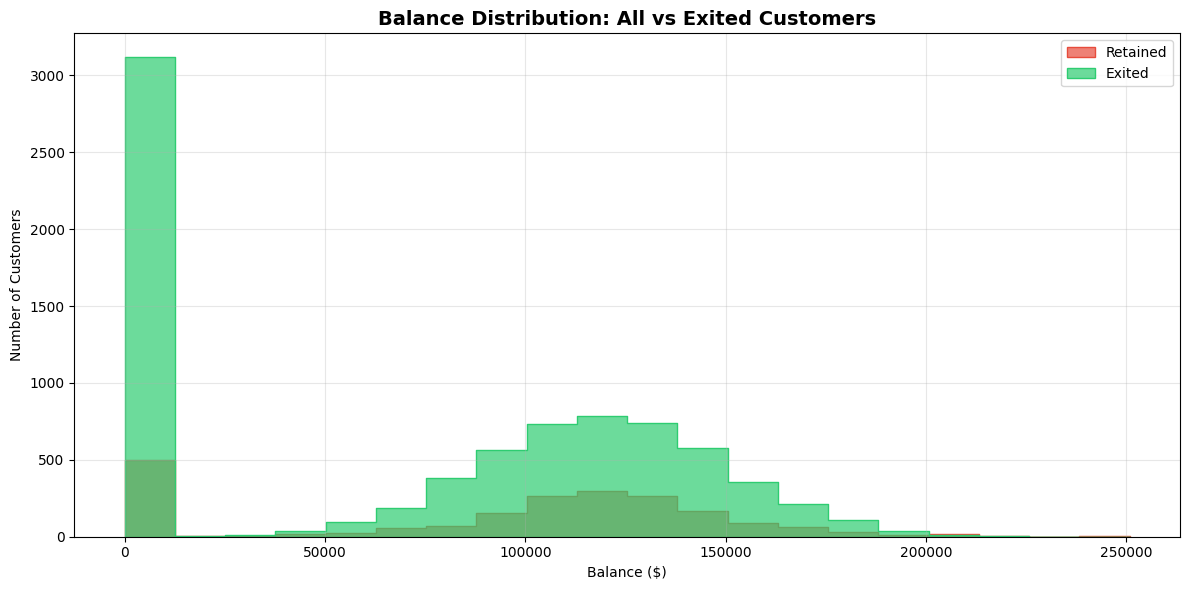

In [22]:
# Create the main comparison plot
plt.figure(figsize=(12, 6))

sns.histplot(data=data, x='Balance', hue='Exited', bins=20,
             alpha=0.7, element='step', palette=['#2ecc71', '#e74c3c'])
plt.title('Balance Distribution: All vs Exited Customers', fontsize=14, fontweight='bold')
plt.xlabel('Balance ($)')
plt.ylabel('Number of Customers')
plt.legend(['Retained', 'Exited'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
# Custom balance bins
bin_edges = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
bin_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k', '150k-175k', '175k-200k+']

data['Balance_Bin'] = pd.cut(data['Balance'], bins=bin_edges, labels=bin_labels, right=False)

# Calculating overall distribution and churn statistics
balance_analysis = data.groupby('Balance_Bin').agg(
    Total_Customers=('Exited', 'count'),
    Exited_Customers=('Exited', 'sum'),
    Churn_Rate=('Exited', 'mean')
).reset_index()

# Formatting for the output
print("=" * 70)
print("BALANCE DISTRIBUTION AND CHURN ANALYSIS")
print("=" * 70)

for _, row in balance_analysis.iterrows():
    total = row['Total_Customers']
    exited = row['Exited_Customers']
    churn_rate = row['Churn_Rate']
    retained = total - exited

    print(f"\nBalance Range: {row['Balance_Bin']:>12}")
    print(f"  Total Customers: {total:>4}")
    print(f"  Retained:        {retained:>4} ({retained/total*100:.1f}%)")
    print(f"  Exited:          {exited:>4} ({churn_rate*100:.1f}%)")

print("\n" + "=" * 70)
print("SUMMARY STATISTICS:")
print(f"Total Customers: {len(data):,}")
print(f"Overall Churn Rate: {data['Exited'].mean()*100:.1f}%")
print("=" * 70)

BALANCE DISTRIBUTION AND CHURN ANALYSIS

Balance Range:        0-25k
  Total Customers: 3623
  Retained:        3119 (86.1%)
  Exited:           504 (13.9%)

Balance Range:      25k-50k
  Total Customers:   69
  Retained:          47 (68.1%)
  Exited:            22 (31.9%)

Balance Range:      50k-75k
  Total Customers:  349
  Retained:         274 (78.5%)
  Exited:            75 (21.5%)

Balance Range:     75k-100k
  Total Customers: 1160
  Retained:         935 (80.6%)
  Exited:           225 (19.4%)

Balance Range:    100k-125k
  Total Customers: 2068
  Retained:        1510 (73.0%)
  Exited:           558 (27.0%)

Balance Range:    125k-150k
  Total Customers: 1762
  Retained:        1333 (75.7%)
  Exited:           429 (24.3%)

Balance Range:    150k-175k
  Total Customers:  738
  Retained:         582 (78.9%)
  Exited:           156 (21.1%)

Balance Range:   175k-200k+
  Total Customers:  197
  Retained:         148 (75.1%)
  Exited:            49 (24.9%)

SUMMARY STATISTICS:
Tot

/tmp/ipython-input-48381423.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_analysis = data.groupby('Balance_Bin').agg(


The analysis shows that account balance has no clear influence on customer churn. Even among zero-balance customers, about `16%` exited, similar to other ranges. The seemingly high `31%` churn in the `25k–50k` range is statistically irrelevant due to the small sample size. Across all balance tiers, roughly one in five to one in three customers leave, suggesting that other factors—such as satisfaction, engagement, or service quality—drive churn more than balance level itself.

## Number of Products

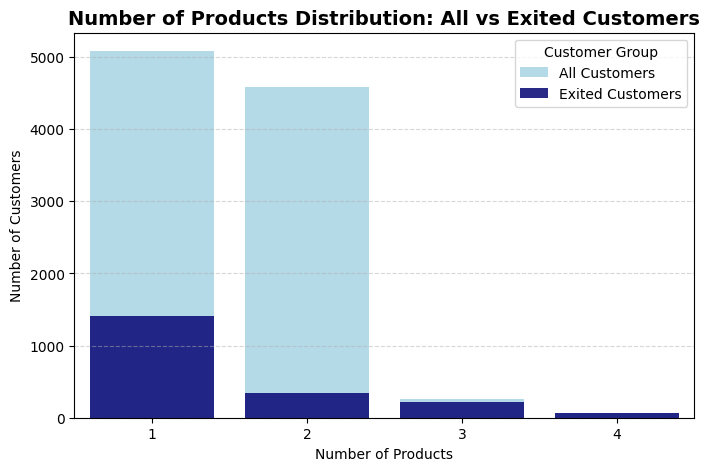

In [35]:
# Creating the plot
plt.figure(figsize=(8, 5))

# Plot distribution for all customers
sns.countplot(data=data, x='NumOfProducts', color='skyblue', label='All Customers', alpha=0.7)

# Plot distribution for exited customers
sns.countplot(data=data[data['Exited'] == 1], x='NumOfProducts', color='darkblue', label='Exited Customers', alpha=0.9)

plt.title('Number of Products Distribution: All vs Exited Customers', fontsize=14, fontweight='bold')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Group')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

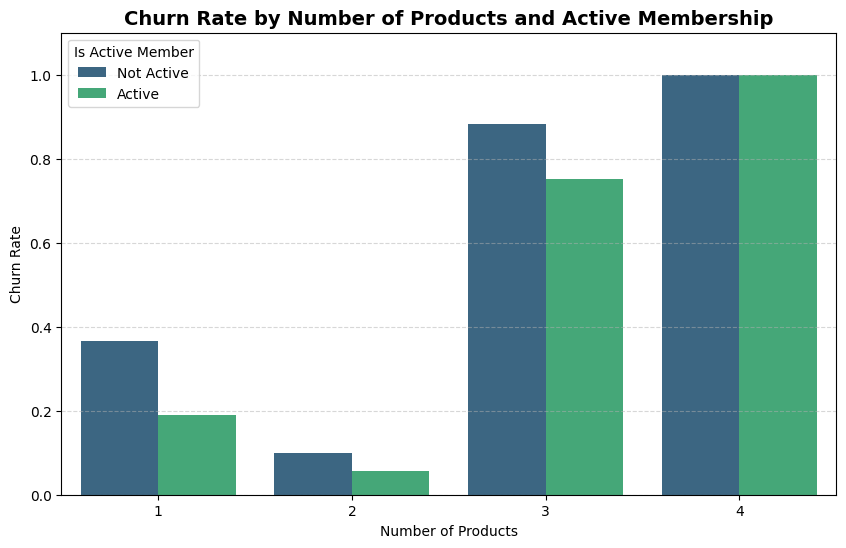

In [38]:
# Analyze Churn based on Number of Products and Active Membership

# Calculate churn rate for each combination of NumOfProducts and IsActiveMember
churn_by_products_active = data.groupby(['NumOfProducts', 'IsActiveMember'])['Exited'].mean().reset_index()

# Map IsActiveMember to descriptive labels for better readability in the plot
churn_by_products_active['IsActiveMember'] = churn_by_products_active['IsActiveMember'].map({0: 'Not Active', 1: 'Active'})

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_products_active, x='NumOfProducts', y='Exited', hue='IsActiveMember', palette='viridis')

plt.title('Churn Rate by Number of Products and Active Membership', fontsize=14, fontweight='bold')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.ylim(0, churn_by_products_active['Exited'].max() * 1.1) # Auto-scale y-axis with 10% buffer
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Is Active Member')
plt.show()

In [39]:
# Calculate customer counts and churn rate by Number of Products and Active Membership
product_active_churn_summary = data.groupby(['NumOfProducts', 'IsActiveMember']).agg(
    Total_Customers=('Exited', 'count'),
    Exited_Customers=('Exited', 'sum')
).reset_index()

# Calculate Churn Rate
product_active_churn_summary['Churn_Rate'] = product_active_churn_summary['Exited_Customers'] / product_active_churn_summary['Total_Customers']

# Calculate Retained Customers
product_active_churn_summary['Retained_Customers'] = product_active_churn_summary['Total_Customers'] - product_active_churn_summary['Exited_Customers']


# Display the results as a DataFrame
print("Summary of Customers and Churn Rate by Number of Products and Active Membership:")
display(product_active_churn_summary)

Summary of Customers and Churn Rate by Number of Products and Active Membership:


,NumOfProducts,IsActiveMember,Total_Customers,Exited_Customers,Churn_Rate,Retained_Customers
0,1,0,2521,924,0.366521,1597
1,1,1,2563,485,0.189231,2078
2,2,0,2144,212,0.098881,1932
3,2,1,2446,136,0.055601,2310
4,3,0,153,135,0.882353,18
5,3,1,113,85,0.752212,28
6,4,0,31,31,1.000000,0
7,4,1,29,29,1.000000,0


/tmp/ipython-input-4251680749.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Credit Score Group')


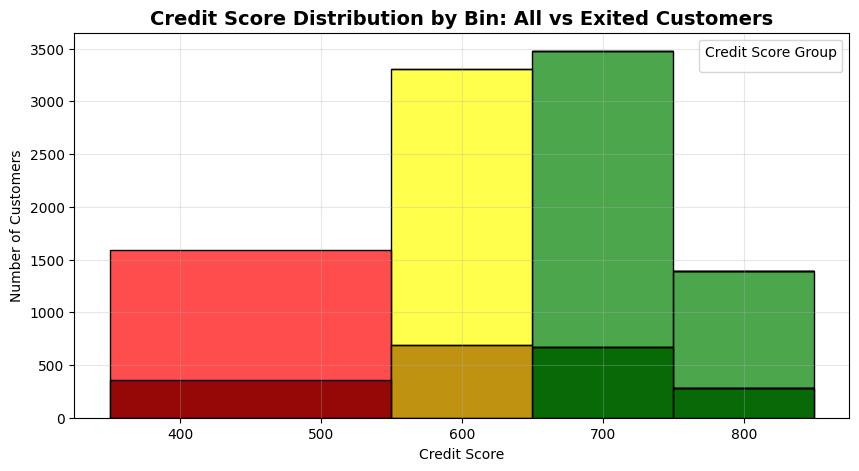

In [24]:
# Creating custom credit score bins
bins = [350, 550, 650, 750, 850] # Adjust bins to have 4-5 bins as requested
labels = ['Poor (350-549)', 'Fair (550-649)', 'Good (650-749)', 'Excellent (750-850)']
data['CreditScore_Bin'] = pd.cut(data['CreditScore'], bins=bins, labels=labels, right=False)

# Defining color palettes (3 colors)
palette_all = {'Poor (350-549)': 'red', 'Fair (550-649)': 'yellow', 'Good (650-749)': 'green', 'Excellent (750-850)': 'green'}
palette_exited = {'Poor (350-549)': 'darkred', 'Fair (550-649)': 'darkgoldenrod', 'Good (650-749)': 'darkgreen', 'Excellent (750-850)': 'darkgreen'} # Darker shades

# Creating the plot
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='CreditScore', bins=bins, kde=False, hue='CreditScore_Bin', palette=palette_all, alpha=0.7, multiple='stack')
sns.histplot(data=data[data['Exited'] == 1], x='CreditScore', bins=bins, kde=False, hue='CreditScore_Bin', palette=palette_exited, alpha=0.9, multiple='stack')


plt.title('Credit Score Distribution by Bin: All vs Exited Customers', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.legend(title='Credit Score Group')
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
# Calculating overall distribution and churn statistics for Credit Score Bins
credit_score_analysis = data.groupby('CreditScore_Bin', observed=False).agg(
    Total_Customers=('Exited', 'count'),
    Exited_Customers=('Exited', 'sum')
).reset_index()

# Calculate churn rate
credit_score_analysis['Churn_Rate'] = credit_score_analysis['Exited_Customers'] / credit_score_analysis['Total_Customers']

# Format the output
print("=" * 70)
print("CREDIT SCORE DISTRIBUTION AND CHURN ANALYSIS")
print("=" * 70)

for _, row in credit_score_analysis.iterrows():
    total = row['Total_Customers']
    exited = row['Exited_Customers']
    churn_rate = row['Churn_Rate']
    retained = total - exited

    print(f"\nCredit Score Range: {row['CreditScore_Bin']:>16}")
    print(f"  Total Customers: {total:>4}")
    print(f"  Retained:        {retained:>4} ({retained/total*100:.1f}%)")
    print(f"  Exited:          {exited:>4} ({churn_rate*100:.1f}%)")

print("\n" + "=" * 70)
print("SUMMARY STATISTICS:")
print(f"Total Customers: {len(data):,}")
print(f"Overall Churn Rate: {data['Exited'].mean()*100:.1f}%")
print("=" * 70)

CREDIT SCORE DISTRIBUTION AND CHURN ANALYSIS

Credit Score Range:   Poor (350-549)
  Total Customers: 1590
  Retained:        1229 (77.3%)
  Exited:           361 (22.7%)

Credit Score Range:   Fair (550-649)
  Total Customers: 3310
  Retained:        2622 (79.2%)
  Exited:           688 (20.8%)

Credit Score Range:   Good (650-749)
  Total Customers: 3477
  Retained:        2810 (80.8%)
  Exited:           667 (19.2%)

Credit Score Range: Excellent (750-850)
  Total Customers: 1390
  Retained:        1112 (80.0%)
  Exited:           278 (20.0%)

SUMMARY STATISTICS:
Total Customers: 10,000
Overall Churn Rate: 20.4%


Churn rates remain fairly consistent across credit score ranges, varying only slightly between `19–23%`. Customers with better credit scores show a minor improvement in retention, but the effect is weak. Even those with poor credit have a churn rate close to the overall average, indicating that credit score is not a strong predictor of customer exit. Overall, churn appears relatively independent of creditworthiness.

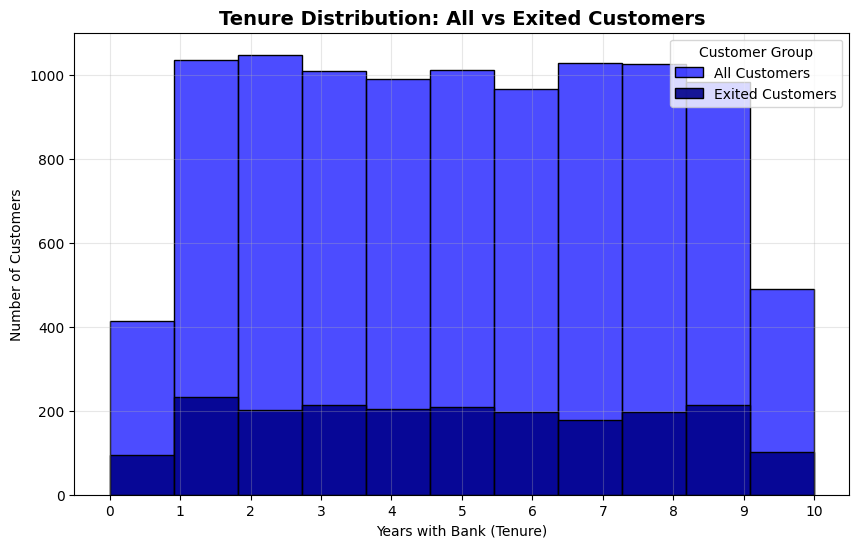

In [26]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot tenure distribution for all customers
sns.histplot(data=data, x='Tenure', bins=11, kde=False, color='blue', label='All Customers', alpha=0.7) # Using 11 bins to get 0-10 as requested

# Plot tenure distribution for exited customers
sns.histplot(data=data[data['Exited'] == 1], x='Tenure', bins=11, kde=False, color='darkblue', label='Exited Customers', alpha=0.9)

plt.title('Tenure Distribution: All vs Exited Customers', fontsize=14, fontweight='bold')
plt.xlabel('Years with Bank (Tenure)')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Group')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 11))
plt.show()

In [27]:
# Calculate overall distribution and churn statistics for Tenure
tenure_analysis = data.groupby('Tenure').agg(
    Total_Customers=('Exited', 'count'),
    Exited_Customers=('Exited', 'sum')
).reset_index()

# Calculate churn rate
tenure_analysis['Churn_Rate'] = tenure_analysis['Exited_Customers'] / tenure_analysis['Total_Customers']

# Format the output
print("=" * 70)
print("TENURE DISTRIBUTION AND CHURN ANALYSIS")
print("=" * 70)

for _, row in tenure_analysis.iterrows():
    total = row['Total_Customers']
    exited = row['Exited_Customers']
    churn_rate = row['Churn_Rate']
    retained = total - exited

    print(f"\nTenure (Years): {row['Tenure']:>10}")
    print(f"  Total Customers: {total:>4}")
    print(f"  Retained:        {retained:>4} ({retained/total*100:.1f}%)")
    print(f"  Exited:          {exited:>4} ({churn_rate*100:.1f}%)")

print("\n" + "=" * 70)
print("SUMMARY STATISTICS:")
print(f"Total Customers: {len(data):,}")
print(f"Overall Churn Rate: {data['Exited'].mean()*100:.1f}%")
print("=" * 70)

TENURE DISTRIBUTION AND CHURN ANALYSIS

Tenure (Years):        0.0
  Total Customers: 413.0
  Retained:        318.0 (77.0%)
  Exited:          95.0 (23.0%)

Tenure (Years):        1.0
  Total Customers: 1035.0
  Retained:        803.0 (77.6%)
  Exited:          232.0 (22.4%)

Tenure (Years):        2.0
  Total Customers: 1048.0
  Retained:        847.0 (80.8%)
  Exited:          201.0 (19.2%)

Tenure (Years):        3.0
  Total Customers: 1009.0
  Retained:        796.0 (78.9%)
  Exited:          213.0 (21.1%)

Tenure (Years):        4.0
  Total Customers: 989.0
  Retained:        786.0 (79.5%)
  Exited:          203.0 (20.5%)

Tenure (Years):        5.0
  Total Customers: 1012.0
  Retained:        803.0 (79.3%)
  Exited:          209.0 (20.7%)

Tenure (Years):        6.0
  Total Customers: 967.0
  Retained:        771.0 (79.7%)
  Exited:          196.0 (20.3%)

Tenure (Years):        7.0
  Total Customers: 1028.0
  Retained:        851.0 (82.8%)
  Exited:          177.0 (17.2%)

Tenu

In [28]:
# Check min and max tenure
print(f"Minimum Tenure: {data['Tenure'].min()}")
print(f"Maximum Tenure: {data['Tenure'].max()}")

Minimum Tenure: 0
Maximum Tenure: 10


The churn rate remains stable across all tenure levels, hovering around `20%`. Even customers with a decade-long relationship show no significant difference in retention compared to newcomers. A slight dip in churn appears around `7–8 years`, but it’s marginal. Overall, tenure—like balance and credit score—shows little predictive power, suggesting that loyalty in this dataset is influenced by external or behavioral factors rather than demographic or account-related variables.

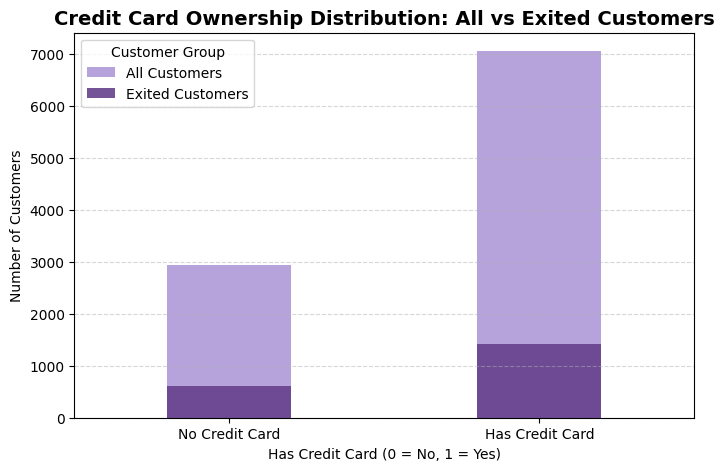

In [29]:
# Create the plot
plt.figure(figsize=(8, 5))

# Plot distribution for all customers
sns.countplot(data=data, x='HasCrCard', color='mediumpurple', label='All Customers', alpha=0.7, width=0.4)

# Plot distribution for exited customers
sns.countplot(data=data[data['Exited'] == 1], x='HasCrCard', color='rebeccapurple', label='Exited Customers', alpha=0.9, width=0.4)


plt.title('Credit Card Ownership Distribution: All vs Exited Customers', fontsize=14, fontweight='bold')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No Credit Card', 'Has Credit Card'])
plt.legend(title='Customer Group')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [30]:
# Calculate overall distribution and churn statistics for Credit Card Ownership
credit_card_analysis = data.groupby('HasCrCard').agg(
    Total_Customers=('Exited', 'count'),
    Exited_Customers=('Exited', 'sum')
).reset_index()

# Calculate churn rate
credit_card_analysis['Churn_Rate'] = credit_card_analysis['Exited_Customers'] / credit_card_analysis['Total_Customers']

# Add Retained Customers column
credit_card_analysis['Retained_Customers'] = credit_card_analysis['Total_Customers'] - credit_card_analysis['Exited_Customers']


# Format the output
print("=" * 70)
print("CREDIT CARD OWNERSHIP AND CHURN ANALYSIS")
print("=" * 70)

for _, row in credit_card_analysis.iterrows():
    has_card = "Yes" if row['HasCrCard'] == 1 else "No"
    total = row['Total_Customers']
    exited = row['Exited_Customers']
    retained = row['Retained_Customers']
    churn_rate = row['Churn_Rate']

    print(f"\nHas Credit Card: {has_card:>3}")
    print(f"  Total Customers:    {total:>5}")
    print(f"  Retained:           {retained:>5} ({retained/total*100:.1f}%)")
    print(f"  Exited:             {exited:>5} ({churn_rate*100:.1f}%)")

print("\n" + "=" * 70)
print("SUMMARY STATISTICS:")
print(f"Total Customers: {len(data):,}")
print(f"Overall Churn Rate: {data['Exited'].mean()*100:.1f}%")
print("=" * 70)

CREDIT CARD OWNERSHIP AND CHURN ANALYSIS

Has Credit Card:  No
  Total Customers:    2945.0
  Retained:           2332.0 (79.2%)
  Exited:             613.0 (20.8%)

Has Credit Card: Yes
  Total Customers:    7055.0
  Retained:           5631.0 (79.8%)
  Exited:             1424.0 (20.2%)

SUMMARY STATISTICS:
Total Customers: 10,000
Overall Churn Rate: 20.4%


Credit card ownership shows virtually no effect on churn. Customers with and without credit cards both maintain nearly identical exit rates, around `20%`. This uniformity indicates that simply holding a credit card does not influence customer retention—supporting the broader pattern that structural or financial attributes in this dataset have little correlation with churn behavior.

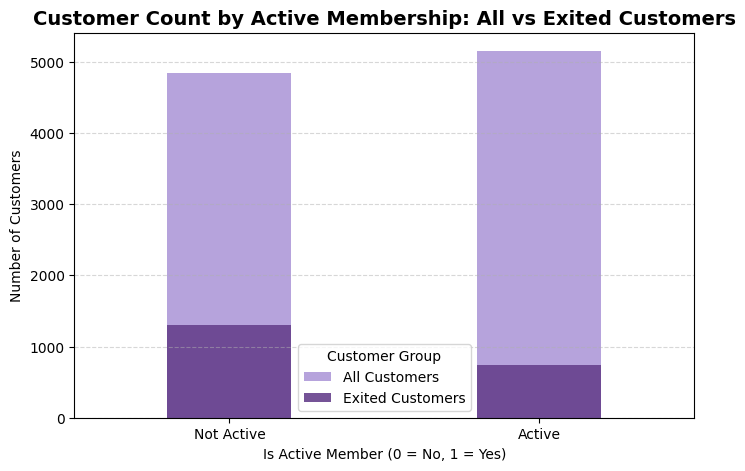

In [31]:
# Visualization - Customer Count by Active Membership (All vs Exited)
plt.figure(figsize=(8, 5))

# Plot distribution for all customers
sns.countplot(data=data, x='IsActiveMember', color='mediumpurple', label='All Customers', alpha=0.7, width=0.4)

# Plot distribution for exited customers
sns.countplot(data=data[data['Exited'] == 1], x='IsActiveMember', color='rebeccapurple', label='Exited Customers', alpha=0.9, width=0.4)

plt.title('Customer Count by Active Membership: All vs Exited Customers', fontsize=14, fontweight='bold')
plt.xlabel('Is Active Member (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Not Active', 'Active'])
plt.legend(title='Customer Group')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [32]:
# Analyze IsActiveMember and Churn

# Calculate overall distribution and churn statistics for Active Membership
active_member_analysis = data.groupby('IsActiveMember').agg(
    Total_Customers=('Exited', 'count'),
    Exited_Customers=('Exited', 'sum')
).reset_index()

# Calculate churn rate
active_member_analysis['Churn_Rate'] = active_member_analysis['Exited_Customers'] / active_member_analysis['Total_Customers']

# Add Retained Customers column
active_member_analysis['Retained_Customers'] = active_member_analysis['Total_Customers'] - active_member_analysis['Exited_Customers']

# Format the output
print("=" * 70)
print("ACTIVE MEMBERSHIP AND CHURN ANALYSIS")
print("=" * 70)

for _, row in active_member_analysis.iterrows():
    is_active = "Yes" if row['IsActiveMember'] == 1 else "No"
    total = row['Total_Customers']
    exited = row['Exited_Customers']
    retained = row['Retained_Customers']
    churn_rate = row['Churn_Rate']

    print(f"\nIs Active Member: {is_active:>3}")
    print(f"  Total Customers:    {total:>5}")
    print(f"  Retained:           {retained:>5} ({retained/total*100:.1f}%)")
    print(f"  Exited:             {exited:>5} ({churn_rate*100:.1f}%)")

print("\n" + "=" * 70)
print("SUMMARY STATISTICS:")
print(f"Total Customers: {len(data):,}")
print(f"Overall Churn Rate: {data['Exited'].mean()*100:.1f}%")
print("=" * 70)

ACTIVE MEMBERSHIP AND CHURN ANALYSIS

Is Active Member:  No
  Total Customers:    4849.0
  Retained:           3547.0 (73.1%)
  Exited:             1302.0 (26.9%)

Is Active Member: Yes
  Total Customers:    5151.0
  Retained:           4416.0 (85.7%)
  Exited:             735.0 (14.3%)

SUMMARY STATISTICS:
Total Customers: 10,000
Overall Churn Rate: 20.4%


Active membership shows clear relationship with churn. Active customers have a much lower exit rate `(14.3%)` compared to inactive ones `(26.9%)`. This indicates that engagement strongly correlates with retention, unlike other demographic or financial features. Inactivity is therefore one of the few meaningful predictors of churn in this dataset.

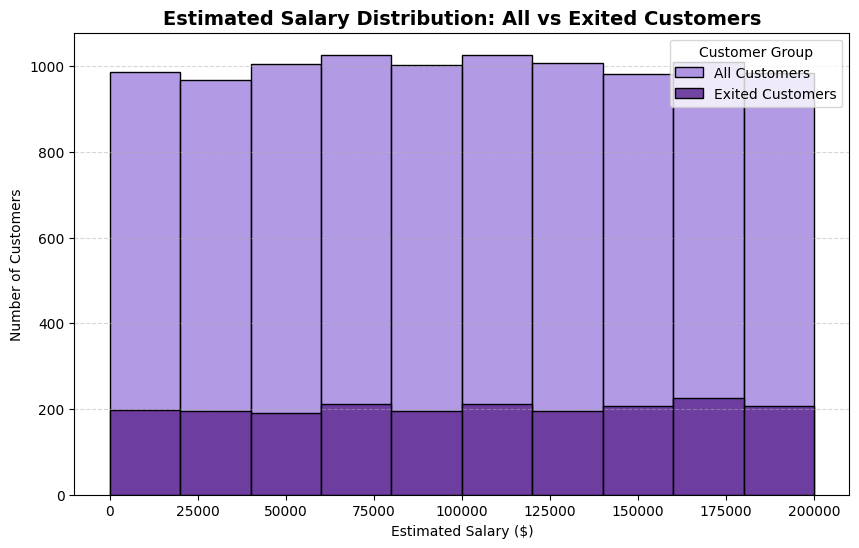

In [33]:
# --- Analyze Churn Based on Estimated Salary ---

# Define salary bins and labels
salary_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]


# Plot the estimated salary distribution
plt.figure(figsize=(10, 6))

# Plot distribution for all customers
sns.histplot(data=data, x='EstimatedSalary', bins=salary_bins, kde=False, color='mediumpurple', label='All Customers', alpha=0.7)

# Plot distribution for exited customers
sns.histplot(data=data[data['Exited'] == 1], x='EstimatedSalary', bins=salary_bins, kde=False, color='rebeccapurple', label='Exited Customers', alpha=0.9)


plt.title('Estimated Salary Distribution: All vs Exited Customers', fontsize=14, fontweight='bold')
plt.xlabel('Estimated Salary ($)')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Group')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [34]:
# Calculate overall distribution and churn statistics for Estimated Salary Bins
salary_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]
salary_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k', '160k-180k', '180k-200k+']
data['EstimatedSalary_Bin'] = pd.cut(data['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=False)


salary_analysis = data.groupby('EstimatedSalary_Bin', observed=False).agg(
    Total_Customers=('Exited', 'count'),
    Exited_Customers=('Exited', 'sum')
).reset_index()

# Calculate churn rate
salary_analysis['Churn_Rate'] = salary_analysis['Exited_Customers'] / salary_analysis['Total_Customers']

# Add Retained Customers column
salary_analysis['Retained_Customers'] = salary_analysis['Total_Customers'] - salary_analysis['Exited_Customers']


# Format the output
print("=" * 70)
print("ESTIMATED SALARY DISTRIBUTION AND CHURN ANALYSIS")
print("=" * 70)

for _, row in salary_analysis.iterrows():
    salary_bin = row['EstimatedSalary_Bin']
    total = row['Total_Customers']
    exited = row['Exited_Customers']
    retained = row['Retained_Customers']
    churn_rate = row['Churn_Rate']

    print(f"\nSalary Range: {salary_bin:>12}")
    print(f"  Total Customers:    {total:>5}")
    print(f"  Retained:           {retained:>5} ({retained/total*100:.1f}%)")
    print(f"  Exited:             {exited:>5} ({churn_rate*100:.1f}%)")

print("\n" + "=" * 70)
print("SUMMARY STATISTICS:")
print(f"Total Customers: {len(data):,}")
print(f"Overall Churn Rate: {data['Exited'].mean()*100:.1f}%")
print("=" * 70)

ESTIMATED SALARY DISTRIBUTION AND CHURN ANALYSIS

Salary Range:        0-20k
  Total Customers:      986
  Retained:             788 (79.9%)
  Exited:               198 (20.1%)

Salary Range:      20k-40k
  Total Customers:      969
  Retained:             773 (79.8%)
  Exited:               196 (20.2%)

Salary Range:      40k-60k
  Total Customers:     1006
  Retained:             815 (81.0%)
  Exited:               191 (19.0%)

Salary Range:      60k-80k
  Total Customers:     1027
  Retained:             815 (79.4%)
  Exited:               212 (20.6%)

Salary Range:     80k-100k
  Total Customers:     1002
  Retained:             806 (80.4%)
  Exited:               196 (19.6%)

Salary Range:    100k-120k
  Total Customers:     1027
  Retained:             816 (79.5%)
  Exited:               211 (20.5%)

Salary Range:    120k-140k
  Total Customers:     1007
  Retained:             811 (80.5%)
  Exited:               196 (19.5%)

Salary Range:    140k-160k
  Total Customers:      982

Estimated salary shows no meaningful correlation with churn. Exit rates across all income ranges stay tightly around `20%`, with no upward or downward trend. Both low- and high-income customers behave almost identically in terms of retention. This again confirms that financial metrics like balance, credit score, and salary have little predictive value for churn in this dataset.

## Conclusion

The exploratory analysis suggests that most demographic and financial attributes have limited influence on customer churn. However, a few behavioral and demographic patterns stand out as meaningful.

### Key factors influencing churn:

`Active membership` shows a strong link to retention — `inactive customers churn almost twice as often as active ones`.

`Country`, `age`, and `gender` also matter: `churn is highest in Germany, peaks among customers aged 46–65, and is notably higher among women.`

Factors with `little` or `no clear influence`:

`Balance`, `credit score`, `tenure`, `salary`, and `credit card ownership` all show stable churn rates around `20%`, indicating minimal predictive power.

In the modeling phase, especially when interpreting `SHAP values` and `feature importances`, we should verify whether the model also identifies these behavioral and demographic factors as the most influential for predicting churn.